1.  30세 이하의 인구 비율이 가장 높은 도시 5개를 찾고, 도시 이름과 인구수를 그래프로 나타내세요.

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
age = pd.read_csv('age_all.csv', index_col=0, encoding='cp949')

In [76]:
age = age.replace(',','', regex=True)
age = age.astype('int')

In [77]:
인구_0_30세합 = np.sum(age.iloc[:, 2:2+30], axis=1)

In [80]:
#30세 이하의 인구 비율은 0세에서 30세의 인구의 합과 총 인구수의 비율입니다
총인구수 = age.iloc[:,0]
인구_30세비율 = 인구_0_30세합 / 총인구수
age['인구_30세비율']=인구_30세비율 # 추가

In [57]:
age_sort = age.sort_values('인구_30세비율', ascending=False).iloc[:5]

<BarContainer object of 5 artists>

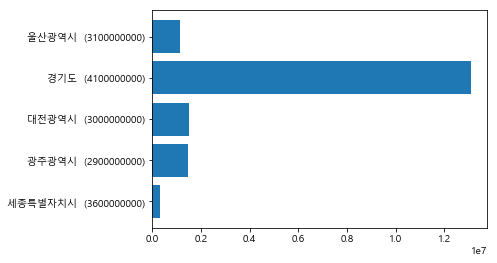

In [82]:
plt.rc('font', family='Malgun Gothic')
plt.barh(age_sort.index, age_sort.iloc[:,0].values)

2. 선릉역과 삼성역에서 아침8~9시에 하차하는 인구수의 합을 구하세요

In [107]:
trans = pd.read_excel('2019년 05월  교통카드 통계자료.xls',
                      sheet_name=3, index_col=3, header=1, encoding='cp949')
trans = trans.iloc[:, :-1]

In [108]:
col = 12
target = trans.loc[['선릉', '삼성(무역센터)']]
target.iloc[:, col]

선릉          321,238
선릉          145,427
삼성(무역센터)    372,585
Name: 하차.4, dtype: object

3. 시간대별로 삼성역과 선릉역의 지하철 승하차 현황을 그래프로 표현하세요. 

   총 4개의 그래프를 겹쳐서 그립니다. 

   삼성역의 승차 그래프, 삼성역의 하차 그래프, 선릉역의 승차 그래프, 선릉역의 하차 그래프)

In [110]:
target.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,승차,하차,승차.1,하차.1,승차.2,하차.2,승차.3,...,승차.19,하차.19,승차.20,하차.20,승차.21,하차.21,승차.22,하차.22,승차.23,하차.23
선릉,2019-05,2호선,220,125,9,"6,654","6,588","13,566","43,589","26,503",...,"34,870","14,505","5,573","6,940",0,133,0,0,0,0
선릉,2019-05,분당선,1023,29,1,"1,273","1,143","2,159","10,252","4,557",...,"6,671","4,637",358,886,0,0,0,0,0,0
삼성(무역센터),2019-05,2호선,219,144,1,"5,594","6,266","9,977","45,881","22,241",...,"29,678","11,034","4,472","5,776",1,"2,394",0,0,0,0


In [111]:
target2 = target.iloc[::2]
target2 = target2.iloc[:, 3:]
target2 = target2.replace(',','', regex=True)
target2 = target2.astype('int')

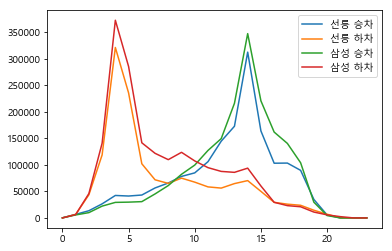

In [122]:
k = plt.plot(target2.iloc[0, ::2].values, label='선릉 승차')
k = plt.plot(target2.iloc[0, 1::2].values, label='선릉 하차')
k = plt.plot(target2.iloc[1, ::2].values, label='삼성 승차')
k = plt.plot(target2.iloc[1, 1::2].values, label='삼성 하차')
plt.legend()

4. 유임 승차에 비해 무임 승차 인원의 비율이 높은 지하철역 5개의 이름과 비율을 그래프로 나타내세요.

In [160]:
trans = pd.read_excel('2019년 05월  교통카드 통계자료.xls',
                      sheet_name=2, index_col=3, header=0, encoding='cp949')

In [161]:
trans = trans.iloc[:,3:-1]
trans = trans.replace(',','', regex=True)
trans = trans.astype('int')

In [162]:
trans.head(1)

,유임승차,유임하차,무임승차,무임하차
지하철역,,,,
서울역,1568570,1489737,247801,242107


In [163]:
비율 = trans['무임승차']/trans['유임승차']
trans['비율'] = 비율

In [171]:
best5=trans.sort_values('비율', ascending=False).iloc[:5]
best5

,유임승차,유임하차,무임승차,무임하차,비율
지하철역,,,,,
소요산,57811,44950,93043,78526,1.609434
제기동,297370,286647,353695,375436,1.189410
용문,49560,50054,57277,56448,1.155710
원덕,7611,7348,7848,7751,1.031139
굴봉산,4033,3961,3796,3749,0.941235


<BarContainer object of 5 artists>

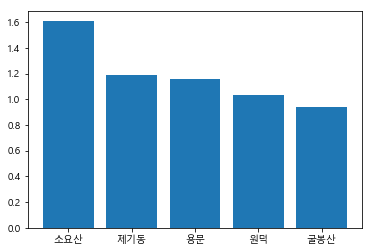

In [172]:
plt.bar(best5.index, best5['비율'])

5. 네이버 금융/국내 증시/시가총액/코스피 에서 상위 종목 50개 데이터를 획득합니다.

In [180]:
tables = pd.read_html(
    'https://finance.naver.com/sise/sise_market_sum.nhn', 
    encoding='cp949',index_col=1)
len(tables)

3

In [181]:
for t in tables:
    print(len(t))

5
81
1


In [190]:
stock = tables[1].iloc[:, :-1]
stock.dropna()

,N,현재가,전일비,등락률,액면가,시가총액,상장주식수,외국인비율,거래량,PER,ROE
종목명,,,,,,,,,,,
삼성전자,1.0,45650.0,50.0,+0.11%,100.0,2725206.0,5969783.0,57.15,3930552.0,7.58,19.63
SK하이닉스,2.0,69200.0,2500.0,+3.75%,5000.0,503778.0,728002.0,50.20,3367963.0,3.24,38.53
현대차,4.0,141500.0,0.0,0.00%,5000.0,302340.0,213668.0,44.37,78704.0,26.44,2.20
셀트리온,5.0,209000.0,1000.0,+0.48%,1000.0,268208.0,128329.0,21.16,118024.0,102.00,10.84
LG화학,6.0,348000.0,4000.0,-1.14%,5000.0,245661.0,70592.0,38.81,33990.0,18.50,8.86
현대모비스,7.0,233000.0,1000.0,+0.43%,5000.0,222065.0,95307.0,47.89,81898.0,12.01,6.30
신한지주,8.0,44600.0,350.0,-0.78%,5000.0,211493.0,474200.0,67.35,491872.0,6.70,9.21
POSCO,9.0,242500.0,2500.0,-1.02%,5000.0,211428.0,87187.0,54.11,63774.0,12.51,3.88
SK텔레콤,10.0,259500.0,500.0,+0.19%,500.0,209535.0,80746.0,40.54,32322.0,6.70,15.52
